# ABU 量化系统  简介（版本 0.1）

* #### __author__ = 'BBFamily'
* ####  __email__ = 'bbfamily@126.com'
* ####  __weixin__ = 'aaaabbbuu'

## 第五部分 度量工具

In [16]:
import ZEnv
import ZLog
import ZCommonUtil
%matplotlib inline

In [2]:
import FactorUnitTest
from BuyGoldenFactor import BuyGoldenFactorClass
import MetricsManger
from MetricsManger import metrics_rsc
from FactorMetrics import METRICSTYPE

**FactorUnitTest中设置了足够多的资金，不会出现资金不足买入的问题**

In [3]:
buy_factors = [{'XD': 42, 'class': BuyGoldenFactorClass, 'draw': True}]
sell_factors = []
parameters = {
                  'stop_loss_base_n': 4.0,
                  'stop_loss_base_n': 2.0,
                  'mv_close_atr': 3.5,
                  'mv_pre_atr': 2.0,
             }
cap, results, orders_pd, action_pd, all_fit_symbols = FactorUnitTest.random_unit_test(ret_cnt_need=300, 
    buy_factors=buy_factors, sell_factors=sell_factors, parameters=parameters, show=False)

BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
usCHLN: date : 20150910 : Can't excute order buy Cnt is zero
usCHLN: Can't excute order for Symbol not found
usCHLN: date : 20151215 : Can't excute order buy Cnt is zero
usCHLN: Can't excute order for Symbol not found
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07
BuyGoldenFactorClass:42open down 0.07


度量方向：

* 资金变化情况
* 因子生效频率
* 每笔花费情况
* 触发器分布情况
* 单子持有天数
* top win, top loss
* 最大回撤
* R指标
......

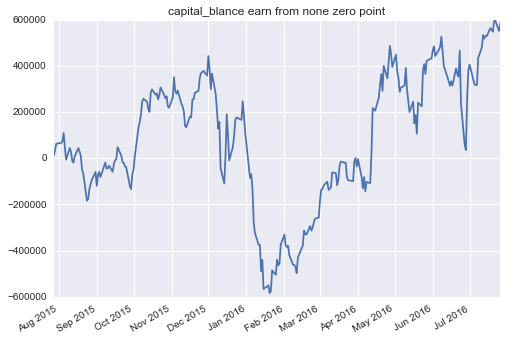

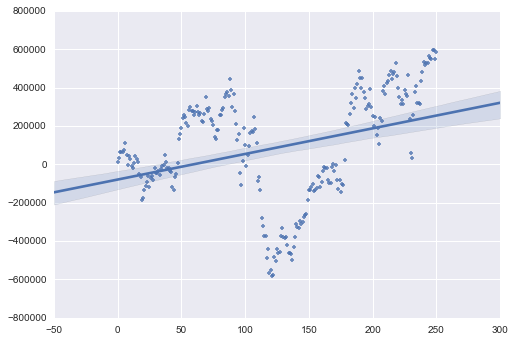

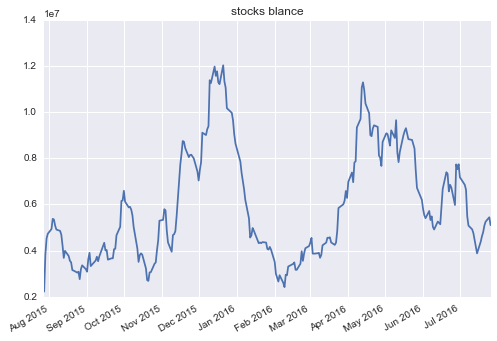

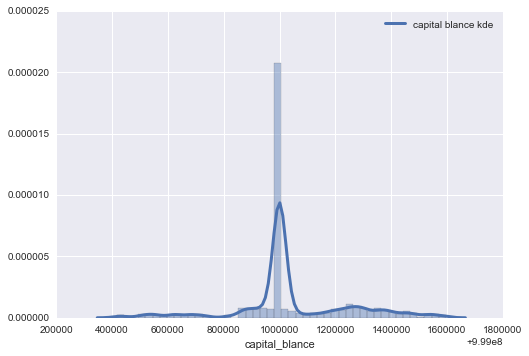

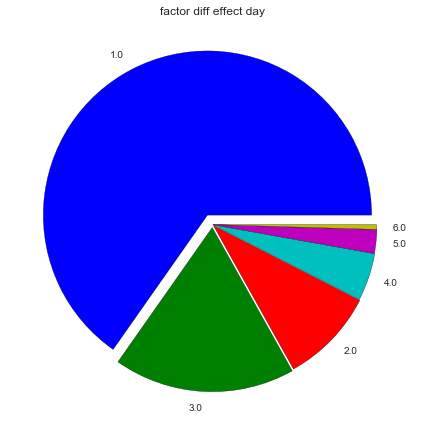

effect mean day: 1.70892018779


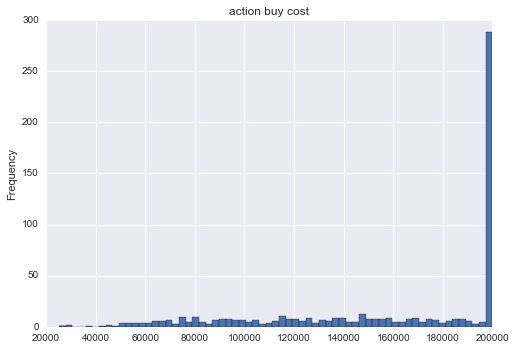

cost info: 
moments_tuple(mean=157675.63453751904, std=48927.479054145835, skewness=-0.7823788142460614, kurtosis=2.2440867173348877)


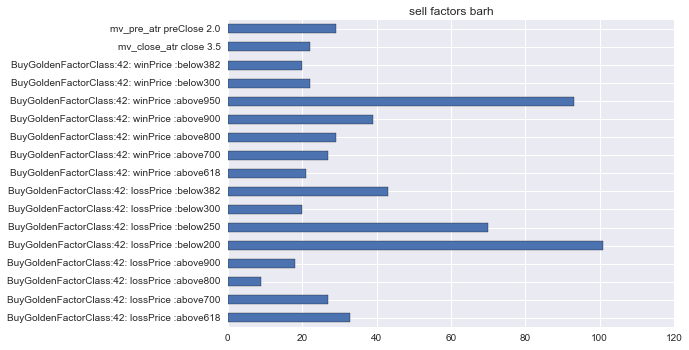

BuyGoldenFactorClass:42: lossPrice :above618     33.0
BuyGoldenFactorClass:42: lossPrice :above700     27.0
BuyGoldenFactorClass:42: lossPrice :above800      9.0
BuyGoldenFactorClass:42: lossPrice :above900     18.0
BuyGoldenFactorClass:42: lossPrice :below200    101.0
BuyGoldenFactorClass:42: lossPrice :below250     70.0
BuyGoldenFactorClass:42: lossPrice :below300     20.0
BuyGoldenFactorClass:42: lossPrice :below382     43.0
BuyGoldenFactorClass:42: winPrice :above618      21.0
BuyGoldenFactorClass:42: winPrice :above700      27.0
BuyGoldenFactorClass:42: winPrice :above800      29.0
BuyGoldenFactorClass:42: winPrice :above900      39.0
BuyGoldenFactorClass:42: winPrice :above950      93.0
BuyGoldenFactorClass:42: winPrice :below300      22.0
BuyGoldenFactorClass:42: winPrice :below382      20.0
mv_close_atr close 3.5                           22.0
mv_pre_atr preClose 2.0                          29.0
dtype: float64


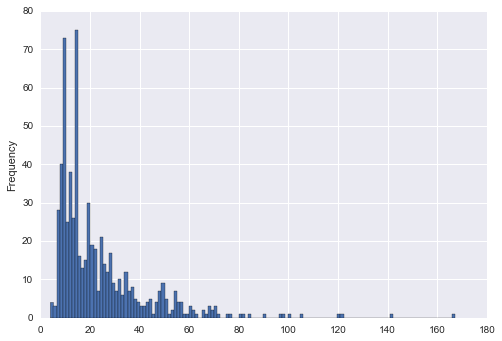

keep days mean: 23.4106870229
keep days median: 16.0

factor win effect = 0.0321027287319%
factor loss effect = 0.0690208667737%


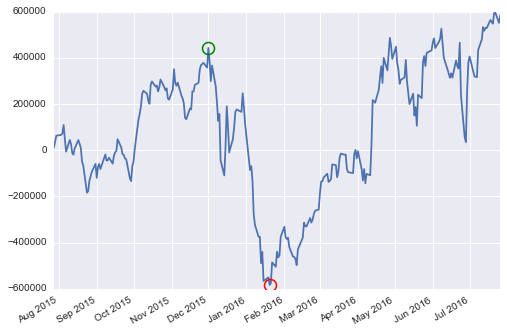

max down rate: 0.00102550606853
{(Timestamp('2015-12-01 00:00:00'), Timestamp('2016-01-20 00:00:00')): 1025960.1469997168}
factor effect symbol rate: 0.845070422535
factor gen order rate: 1.83943661972

R win rate: 0.0
result win rate: 0.468702290076
R return: 0.0
P return: 0.0085380037746
C return: 0.00058334935
C PB:      1334.90169093

order win mean: 11681.0828664 cg: 9.09404855631
order win max: 62286.84 cg: 122.434782609

Win Top 5
2015-09-10           NaN
2016-05-05    122.434783
2016-02-11     88.967972
2015-08-24     69.595769
2016-04-11     54.968944
Name: profit_cg_hunder, dtype: float64

order loss mean: -9677.31924051 cg: -7.15101213914
order loss max: -33181.21 cg: -34.6820809249

2015-10-02   -34.682081
2016-05-10   -28.237129
2015-09-15   -25.924439
2015-07-28   -24.054647
2016-03-02   -23.787522
Name: profit_cg_hunder, dtype: float64



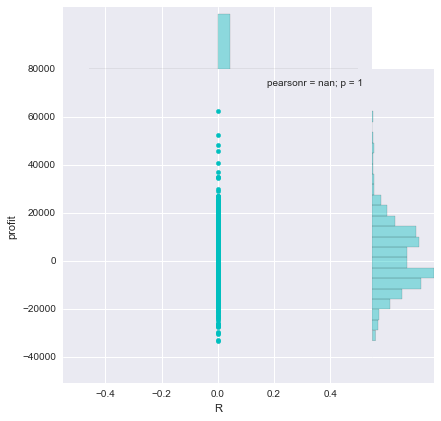

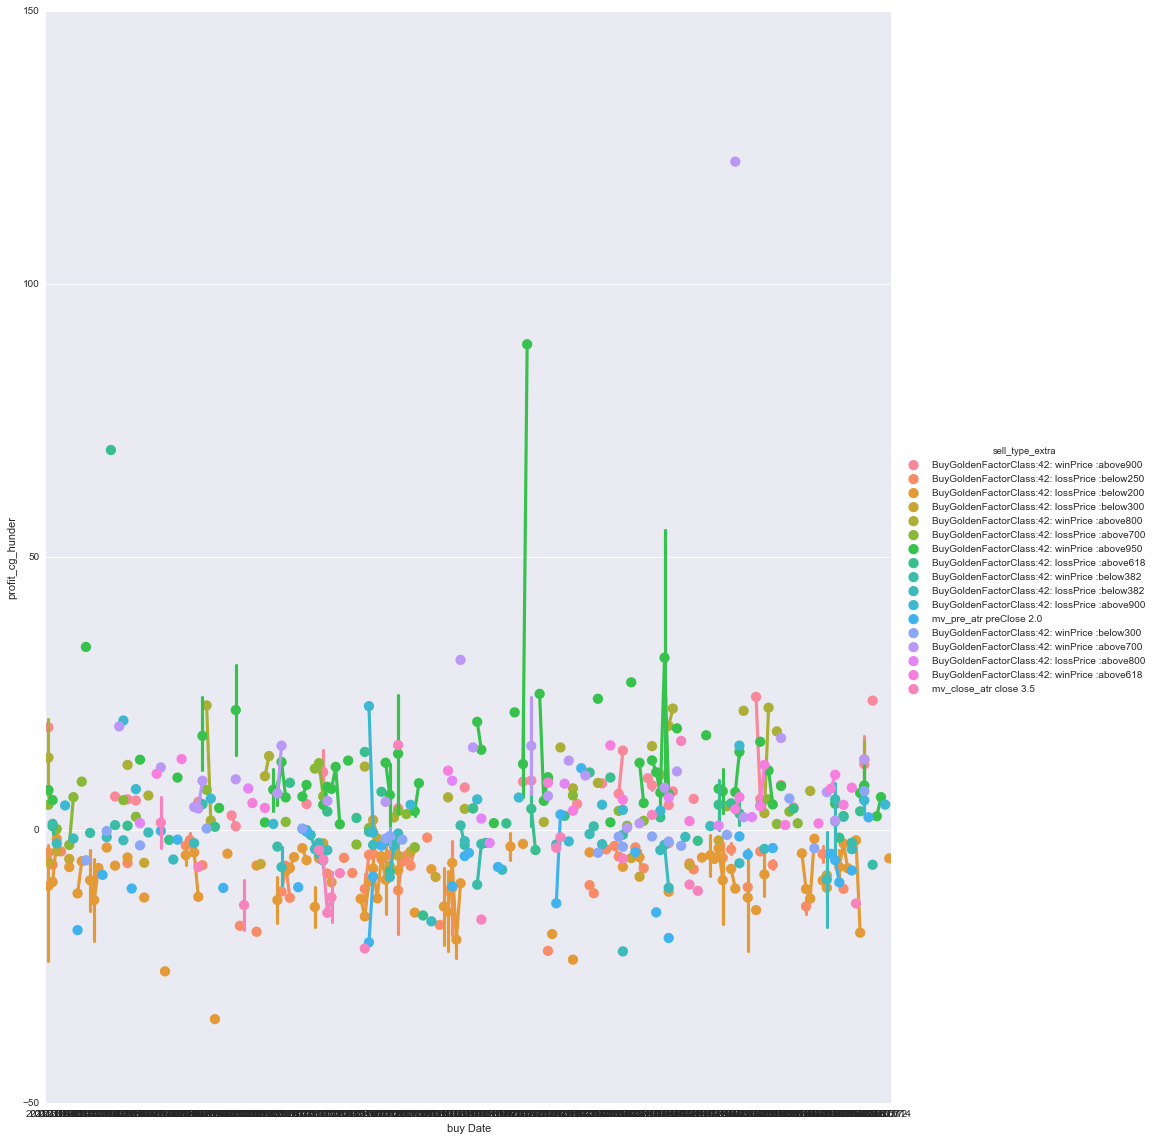

top 10 win profit_cg mean: 54.0702347384
top 10 loss profit_cg  mean: -24.9837462433


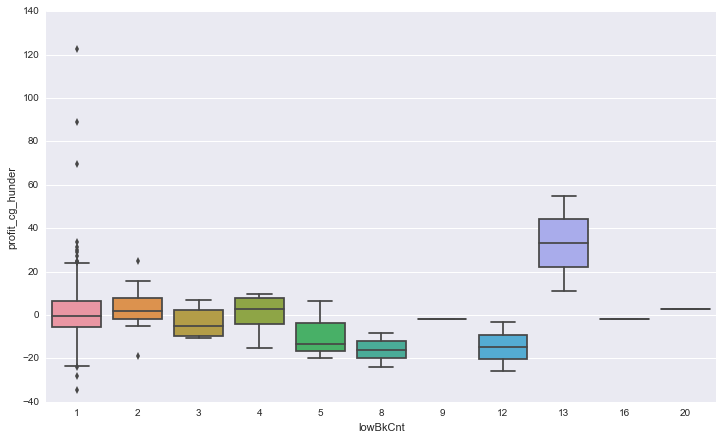

TOP 3 = [(1, 605), (2, 25), (3, 8)]


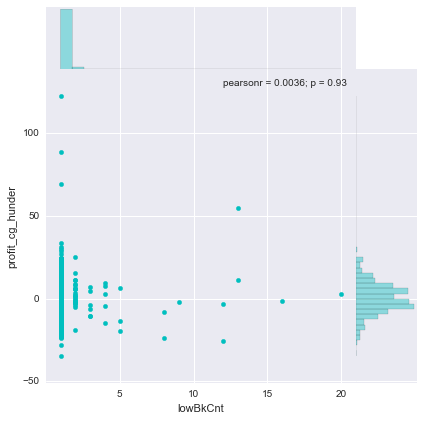

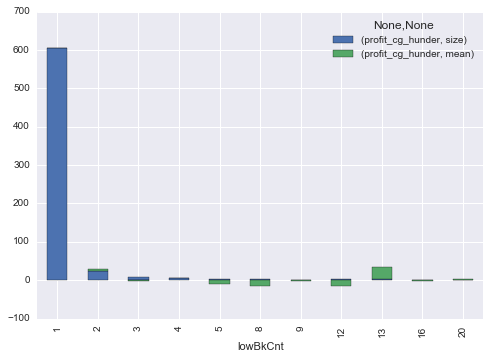

{'grid_scroe': defaultdict(list,
             {'max_down': [0.0010255060685305164],
              'return': [(0.008538003774597498,
                0.0,
                0.00058334934999981769,
                1334.9016909295556)],
              'sc_efm': [-2.0],
              'sc_emd': [5.0],
              'sc_fwl': [3.2758620689655178],
              'sc_wl10m': [4.473684210526315],
              'sc_wlm': [-2.6315789473684212]}),
 'score': 8.1179673321234116}

In [4]:
rsc = metrics_rsc(*(cap, results, orders_pd, action_pd, all_fit_symbols))
MetricsManger.make_metrics_from_rsc(rsc, METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value)

**对多年数据进行回测**

        如下：
            n_folds： 6年数据回测生成五年单子
            train_test_split：回测时预留一symbols本地话，当use_last_test为True 时只用一份测试symbols进行测试
            ret_cnt_need ＝ 0：回测所有股票

In [ ]:
import BuyGoldenFactor
BuyGoldenFactor.g_enable_fiter = True
buy_factors = [{'XD': 42, 'class': BuyGoldenFactorClass, 'draw': True}]
out, orders_pd = MetricsManger.make_metrics_rsc_mul_symbol_grid(buy_factors, n_folds=6, 
    score_type=METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value, ret_cnt_need=0, train_test_split=False, 
        use_last_test=False, force_one_process=False)

In [15]:
# fn = './data/cache/orders_pd_ump_hit_predict_abu'
# key = 'orders_pd_ump_hit_predict_abu'
# ZCommonUtil.dump_hdf5(orders_pd, key, fn)

In [4]:
# fn = './data/cache/golden_n6_abu'
# key = 'golden_n6_abu'
# ZCommonUtil.dump_hdf5(orders_pd, key, fn)

In [5]:
# orders_pd = ZCommonUtil.load_hdf5(fn, key)

In [6]:
orders_pd.shape

(47374, 31)

**添加了大量ml特征，一部分是买入时生成的特征，可直接做机器学习数据，或者离散化后等手段作为学习数据，
另外一部时是结果出来后做统计分析等作用**

In [13]:
import pandas as pd
pd.options.display.max_columns = 40
orders_pd.head()

,buy Date,buy Price,buy Cnt,buyFactor,Sell Date,Sell Price,Sell Type,Symbol,MaxLoss,ExtraInfo,key,profit,result,sell_type_extra,R,sharpe,profit_cg,profit_cg_hunder,keep_days,lowBkCnt,his_miss_days,atr_std,deg_hisWindowPd,deg_windowPd,deg_60WindowPd,jump_power,diff_days,wave_score1,wave_score2,wave_score3,symbol_index
2016-02-08,20160208,10.6550,18770,BuyGoldenFactorClass:42,None,NaN,keep,usIRC,9.88,"{'wave_score3': 0.28340811730873633, 'wave_sco...",387,NaN,0,,0.0,0,NaN,NaN,212,1,0,0.333113,-5.230112,2.191405,10.656927,1.370972,165,0.043812,0.376757,0.283408,2
2016-02-10,20160210,13.4750,5106,BuyGoldenFactorClass:42,None,NaN,keep,usMW,7.55,"{'wave_score3': 0.78389574550219021, 'wave_sco...",389,NaN,0,,0.0,0,NaN,NaN,210,5,0,0.264866,-41.806700,-8.563149,-24.950338,5.694825,61,0.683403,0.828747,0.783896,2
2016-02-26,20160226,26.0550,7676,BuyGoldenFactorClass:42,None,NaN,keep,usGSJ,25.30,"{'wave_score3': 1.8096386434767127, 'wave_scor...",400,NaN,0,,0.0,0,NaN,NaN,194,3,0,1.661821,-1.541833,-1.937670,-1.984387,2.936570,14,1.795688,1.888782,1.809639,2
2016-03-18,20160318,6.4100,31201,BuyGoldenFactorClass:42,None,NaN,keep,usSVA,5.61,"{'wave_score3': 0.96181150676261862, 'wave_sco...",415,NaN,0,,0.0,0,NaN,NaN,173,1,0,0.983450,7.293021,12.349717,11.591143,1.000179,206,0.680251,0.956378,0.961812,2
2016-03-22,20160322,38.4075,1761,BuyGoldenFactorClass:42,None,NaN,keep,usW,29.71,"{'wave_score3': 1.283520760470382, 'wave_score...",417,NaN,0,,0.0,0,NaN,NaN,169,1,0,0.331425,13.778363,1.991378,-3.961819,0.000000,0,0.935627,0.893307,1.283521,2


In [7]:
from UmpMain import UmpMainClass
from MlFiterDegPd import MlFiterDegPdClass

**所有单子合并显示的情况**

* 单子数量
* 胜率
* 盈利相对百分比
* 平均输赢百分比

all fit order = (44906, 31)
win rate = 0.500757137131
profit_cg.sum() = 272.117613217
win mean = 0.0743788075658 loss_mean = -0.0626291433739 


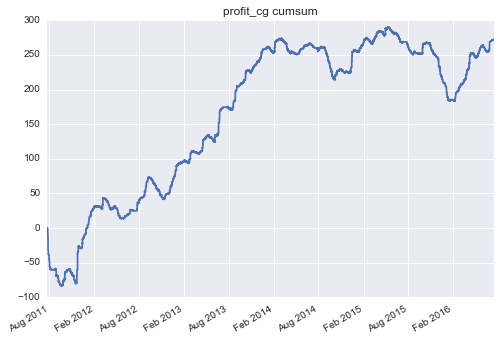

In [8]:
UmpMainClass(orders_pd, MlFiterDegPdClass).show_general()

In [18]:
import StatsKeepDay

In [20]:
out, order_last_bond = StatsKeepDay.keep_day_maxths(orders_pd)

**理论最佳收入**

In [31]:
import numpy as np
maxth95s = [maxth[1] for part in out for maxth in part]
np.array(maxth95s).mean()

11.82960641025641

**train_test_split True 保留测试集symbols，只生成训练集**

In [3]:
buy_factors = [{'XD': 42, 'class': BuyGoldenFactorClass, 'draw': True}]
out, orders_pd_train = MetricsManger.make_metrics_rsc_mul_symbol_grid(buy_factors, n_folds=6, 
    score_type=METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value, ret_cnt_need=0, train_test_split=True, 
    use_last_test=False, force_one_process=False)

In [6]:
# fn = './data/cache/golden_n6_train_abu'
# key = 'golden_n6_train_abu'
# ZCommonUtil.dump_hdf5(orders_pd_train, key, fn)

In [ ]:
# orders_pd_train = ZCommonUtil.load_hdf5(fn, key)

**少了5000左右单子**

In [34]:
orders_pd_train.shape, orders_pd.shape

((42537, 31), (47374, 31))

使用orders_pd_train为学习数据生成的模型判别器，作用在保留的test集上使用判别器回测，
对比没有使用判别器优化结果的数据集, 对比作用结果：

        下面生成没有使判别器生产回测数据
        BuyGoldenFactor.g_enable_fiter = False
        use_last_test=True

In [36]:
import BuyGoldenFactor
BuyGoldenFactor.g_enable_fiter = False
buy_factors = [{'XD': 42, 'class': BuyGoldenFactorClass, 'draw': True}]
out, orders_pd_test = MetricsManger.make_metrics_rsc_mul_symbol_grid(buy_factors, n_folds=6, 
    score_type=METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value, ret_cnt_need=0, train_test_split=False, 
    use_last_test=True, force_one_process=False)

看来准确的数量是4837个单子

In [39]:
orders_pd_test.shape

(4837, 31)

In [40]:
# fn = './data/cache/golden_n6_test_abu'
# key = 'golden_n6_test_abu'
# ZCommonUtil.dump_hdf5(orders_pd_test, key, fn)

In [ ]:
# orders_pd_test = ZCommonUtil.load_hdf5(fn, key)

做好这些数据，在解决方案部分用到